In [ ]:
# ! pip install pandas scikit-learn matplotlib seaborn 

## Import Libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

C:\Users\elmus\AppData\Local\Temp\ipykernel_12052\810504572.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:

df = pd.read_csv("new_churn_data.csv")

df.index = range(1, len(df) + 1)

df.insert(0, "customerID", df.index)

df.head(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio
1,1,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000
2,2,34,1,One year,Mailed check,56.95,1889.50,0,0.030140
3,3,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920
4,4,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980
5,5,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205


## Prepping the data further

In [4]:

payment_method_dummies = pd.get_dummies(df['PaymentMethod'])
contract_dummies = pd.get_dummies(df['Contract'])

# Combine the dummy variables with the original DataFrame
df = pd.concat([df, payment_method_dummies, contract_dummies], axis=1)
df.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
1,1,1,0,Month-to-month,Electronic check,29.85,29.85,0,1.000000,False,False,True,False,True,False,False
2,2,34,1,One year,Mailed check,56.95,1889.50,0,0.030140,False,False,False,True,False,True,False
3,3,2,1,Month-to-month,Mailed check,53.85,108.15,1,0.497920,False,False,False,True,True,False,False
4,4,45,0,One year,Bank transfer (automatic),42.30,1840.75,0,0.022980,True,False,False,False,False,True,False
5,5,2,1,Month-to-month,Electronic check,70.70,151.65,1,0.466205,False,False,True,False,True,False,False


## Convert dummy variables to numeric

In [5]:
categorical_columns = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)', 'Month-to-month', 'One year', 'Two year']

for column in categorical_columns:
    df[column] = pd.factorize(df[column])[0]

df.sample(5)

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
572,572,11,1,One year,Credit card (automatic),64.90,697.25,0,0.093080,0,1,1,0,1,1,0
691,691,31,1,One year,Bank transfer (automatic),75.25,2344.50,0,0.032096,1,0,1,0,1,1,0
4232,4232,57,1,One year,Mailed check,19.40,1061.60,0,0.018274,0,0,1,1,1,1,0
1043,1043,43,1,Month-to-month,Bank transfer (automatic),99.30,4209.95,0,0.023587,1,0,1,0,0,0,0
294,294,6,1,Month-to-month,Electronic check,89.35,567.80,0,0.157362,0,0,0,0,0,0,0


In [6]:
# Drop the original categorical columns
df.drop(['PaymentMethod', 'Contract'], axis=1, inplace=True)
df.head(5)

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
1,1,1,0,29.85,29.85,0,1.000000,0,0,0,0,0,0,0
2,2,34,1,56.95,1889.50,0,0.030140,0,0,1,1,1,1,0
3,3,2,1,53.85,108.15,1,0.497920,0,0,1,1,0,0,0
4,4,45,0,42.30,1840.75,0,0.022980,1,0,1,0,1,1,0
5,5,2,1,70.70,151.65,1,0.466205,0,0,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 1 to 7032
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   customerID                            7032 non-null   int64  
 1   tenure                                7032 non-null   int64  
 2   PhoneService                          7032 non-null   int64  
 3   MonthlyCharges                        7032 non-null   float64
 4   TotalCharges                          7032 non-null   float64
 5   Churn                                 7032 non-null   int64  
 6   MonthlyCharges_to_TotalCharges_Ratio  7032 non-null   float64
 7   Bank transfer (automatic)             7032 non-null   int64  
 8   Credit card (automatic)               7032 non-null   int64  
 9   Electronic check                      7032 non-null   int64  
 10  Mailed check                          7032 non-null   int64  
 11  Month-to-month   

In [8]:
df.isna().sum()

customerID                              0
tenure                                  0
PhoneService                            0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
MonthlyCharges_to_TotalCharges_Ratio    0
Bank transfer (automatic)               0
Credit card (automatic)                 0
Electronic check                        0
Mailed check                            0
Month-to-month                          0
One year                                0
Two year                                0
dtype: int64

# Modelling

## break data into features and targets

In [9]:
features = df.drop('Churn', axis=1)
targets = df['Churn']


In [10]:
features.sample()

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
545,545,34,1,78.95,2647.2,0.029824,1,0,1,0,1,1,0


In [11]:
targets.head()

1    0
2    0
3    1
4    0
5    1
Name: Churn, dtype: int64

In [12]:
X = features
y = targets

## split data into training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


Here we perform a train-test split on the dataset.

X represents the features (input variables) of the dataset.

y represents the target variable (churn).

stratify=y ensures that the class distribution of the target variable y is preserved in the train-test split. This means that the proportion of different classes in y will be the same in both the training and testing datasets. This ensures that each class is represented in both training and testing sets.

test_size=0.2 specifies the proportion of the dataset to include in the testing set. We set it to 20%, meaning that 20% of the dataset will be reserved for testing, and the remaining 80% will be used for training.

random_state=42 sets the seed for random number generation. This ensures that the split is reproducible, meaning if you run the code multiple times with the same random_state, you'll get the same split each time. It's useful for reproducibility and debugging.

After execution

    X_train contains the features of the training dataset.

    X_test contains the features of the testing dataset.

    y_train contains the target variable values corresponding to the training dataset - churn

    y_test contains the target variable values corresponding to the testing dataset - churn

In [14]:
X_train.shape

(5625, 13)

The output (5625, 13) from X_train.shape means that,

    X_train is a NumPy array or DataFrame representing the features (input variables) of the training dataset.

    The first number, 5625, represents the number of samples (rows) in the training dataset while the second number, 13, represents the number of features (columns) in the training dataset.

Therefore,

    There are 5625 samples in the training dataset.
    
    There are 13 features in the training dataset.

This information is crucial for understanding the dimensions of the dataset, which is essential for various operations, including training machine learning models.

In [15]:
X_test.shape

(1407, 13)

In [16]:
y_train.shape

(5625,)

In [17]:
y_test.shape

(1407,)

## Fit model into training data

In [18]:
lr_model = LogisticRegression(max_iter=5000)
lr_model.fit(X_train, y_train)

lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

This means that the model will use a maximum of 5000 iterations during training.

In [19]:
df['Churn'].value_counts(normalize=True)


Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Here we calculate the frequency (count) of each unique value in the Churn column of the DataFrame df. Setting normalize=True returns the relative frequencies (proportions) instead of raw counts. 
The output shows the proportion of the two unique values as,

    Yes: 0.265785
    No : 0.734215

This information is essential for understanding the class distribution and assessing the balance of the dataset.

In [20]:
print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.7991111111111111
0.7860696517412935


Here we calculate the accuracy score of the logistic regression model on the training data (X_train, y_train) and test data (X_test, y_test). The score method in scikit-learn returns the mean accuracy on the given test data and labels. It computes the accuracy of the model by comparing the predicted labels to the actual labels and then calculates the proportion of correct predictions.

The accuracy of the logistic regression model on the training data is approximately `79.96%`. This means that the model correctly predicts the churn status of about 79.96% of the customers in the training dataset.

The accuracy of the logistic regression model on the test data is approximately `78.61%`. This means that the model correctly predicts the churn status of about 78.61% of the customers in the test dataset.

## Plotting confusion matrix

In [21]:
# Predict test dataset

predictions = lr_model.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

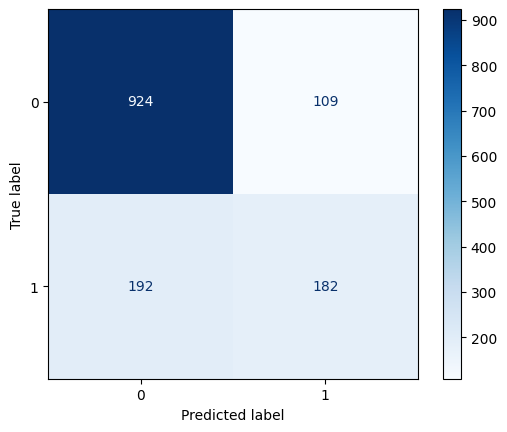

In [22]:
# construct the confusion matix
cm = confusion_matrix(y_test, predictions, labels=lr_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

The confusion matrix shows true negatives (TN, or a prediction of 924 when the true label is 0), false negatives (FN, prediction=0 true=1) of 192, true positives (TP, prediction=true=1) of 182 and false positives (FP, prediction=1 true=0) of 109. From this, we can get an idea of how the algorithm is performing and compare multiple models. 



## Interpretation based on Business context

True negatives (TN): The model correctly predicted 924 instances where the true label is 0 (no churn). This signifies the number of customers who were correctly identified as not churning. These are satisfied customers who were retained by the company.

False negatives (FN): The model incorrectly predicted 0 (no churn) when the true label is 1 (churn) in 192 instances. This signifies the number of customers who were incorrectly identified as not churning, leading to missed opportunities for intervention. These are customers who churned despite the model predicting otherwise.

True positives (TP): The model correctly predicted 182 instances where the true label is 1 (churn). This signifies the number of customers who were correctly identified as churning. These are customers who actually churned, and the model successfully flagged them for attention or intervention.

False positives (FP): The model incorrectly predicted 1 (churn) when the true label is 0 (no churn) in 109 instances. This signifies the number of customers who were incorrectly identified as churning, leading to unnecessary intervention or resources being allocated to customers who were not at risk of churning.


## Tuning the model

In [23]:

lr_model.predict_proba(X_test)

array([[0.97633442, 0.02366558],
       [0.56106092, 0.43893908],
       [0.99576459, 0.00423541],
       ...,
       [0.95329327, 0.04670673],
       [0.96777087, 0.03222913],
       [0.9950827 , 0.0049173 ]])

In [24]:
lr_model.predict(X_test)[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [25]:
(lr_model.predict_proba(X_test)[:10, 1] > 0.5).astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

The result is an array of integers indicating the binary predictions (0 or 1) for the first 10 samples in the test set, based on whether the predicted probability of the positive class is greater than 0.5.


## Lowering threshold

In [26]:
predictions_lower_thresh = (lr_model.predict_proba(X_test)[:, 1] > 0.2).astype('int')
predictions_lower_thresh

array([0, 1, 0, ..., 0, 0, 0])

The result is an array of integers indicating the binary predictions (0 or 1) for all samples in the test set, based on whether the predicted probability of the positive class is greater than the lower threshold of 0.2. This allows for flexibility in adjusting the sensitivity-specificity trade-off of the model by setting different probability thresholds for making binary predictions.

## Checking accuracy and TP rate

In [27]:
print(accuracy_score(y_test, predictions_lower_thresh))


0.6901208244491827


The accuracy score of approximately 69.01% signifies the overall proportion of correct predictions made by the model on the test set. Specifically, it indicates that:

Out of all the samples in the test set, approximately 69.01% of them were correctly classified by the model.

The model's predictions matched the true labels for approximately 69.01% of the samples in the test set.

In [28]:
tn, fp, fn, tp  = confusion_matrix(y_test, predictions_lower_thresh).flatten()
print(tp / (tp + fn))

0.8743315508021391


This means that the model correctly identified approximately 87.43% of the actual churn cases from the total number of churn cases in the dataset. Out of all the customers who actually churned, the model correctly identified 87.43% of them as churned.

A high True Positive Rate (TPR) signifies that the model is effective in identifying positive cases (churned customers), which is vital for making informed decisions and taking appropriate actions to address churn and retain valuable customers.

## coefficients from the model

In [29]:
lr_model.coef_

array([[ 3.49096921e-05, -2.22945403e-02, -9.73274156e-01,
         3.36498234e-02, -1.16515162e-05,  1.53376688e+00,
        -9.60472912e-02, -6.33837511e-02, -3.54040713e-01,
        -1.94609671e-01, -1.02444919e+00, -2.79699214e-02,
        -9.96479257e-01]])

<Axes: >

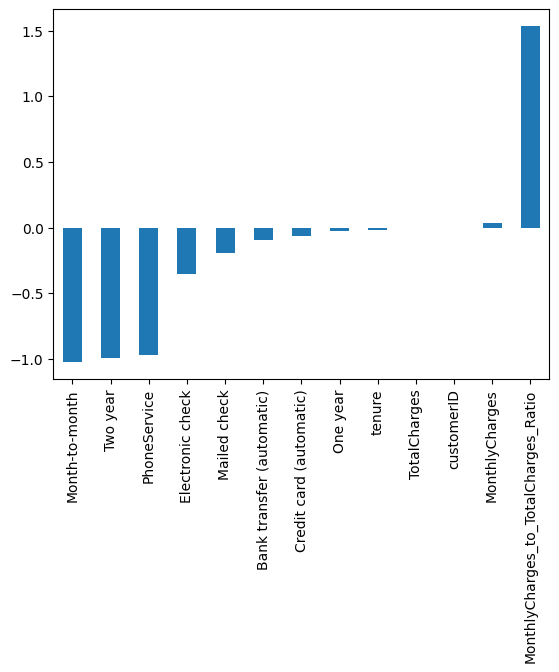

In [30]:
coef_df = pd.DataFrame(data=lr_model.coef_, columns=features.columns)

coef_df.T.sort_values(by=0).plot.bar(legend=False)


The output lr_model.coef_  provides the coefficients (weights) assigned to each feature by the logistic regression model. These coefficients indicate the strength and direction of the relationship between each feature and the target variable (churn).


**Coefficients Interpretation**

Positive coefficients indicate a positive relationship with the target variable (churn), meaning that as the feature value increases, the likelihood of churn also increases.

Negative coefficients indicate a negative relationship with the target variable (churn), meaning that as the feature value increases, the likelihood of churn decreases.

Larger coefficient magnitudes (absolute values) indicate stronger associations with the target variable.

**Plot Interpretation**

The plot visualizes the coefficients for each feature in a bar chart format.

Features with positive coefficients are represented by bars pointing upwards, while features with negative coefficients are represented by bars pointing downwards.

The length of each bar indicates the magnitude of the coefficient, representing the strength of the association with the target variable.

Features with longer bars (either positive or negative) such as the contracts of Month-to-month abd Two year, PhoneService and the MonthlyCharges_to_TotalCharges_Ratio have a stronger influence on the model's predictions.

Those with positive coefficients - MonthlyCharges_toTotalCharges_Ratio - have a positive impact on the likelihood of churn, while features with negative coefficients (downward bars) have a negative impact.

The plot provides insights into which features are most influential in predicting churn, allowing stakeholders to prioritize and focus on key factors affecting customer churn.

The coefficients and the plot help in understanding the relative importance of different features in predicting churn, guiding decision-making processes aimed at reducing churn rates and improving customer retention strategies.

# Advanced section

## Other ML Models

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [32]:
rf_model = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)
gb_model = GradientBoostingClassifier(max_depth=4, random_state=42)


In [33]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, random_state=42)

In [34]:
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))


0.8055111111111111
0.7889125799573561


In [35]:
print(gb_model.score(X_train, y_train))
print(gb_model.score(X_test, y_test))


0.8387555555555556
0.7860696517412935


We introduce two additional classifiers, Random Forest and Gradient Boosting, and evaluate their performance on the training and test sets.

**Random Forest Classifier**

Trained with a maximum depth of 5 and using all available CPU cores for parallel processing. Achieved an accuracy score of approximately 80.55% on the training set and 78.89% on the test set.

**Gradient Boosting Classifier**

Trained with a maximum depth of 4. Achieved an accuracy score of approximately 83.88% on the training set and 78.61% on the test set.

**Interpretation**

Both models demonstrate decent performance, with the Gradient Boosting Classifier slightly outperforming the Random Forest Classifier on the training set.

However, the Random Forest Classifier performs slightly better on the test set compared to the Gradient Boosting Classifier, suggesting that it may generalize slightly better to unseen data.

The difference in performance between the training and test sets for both models is relatively small, indicating that there is no significant overfitting.

Both models seem to provide reasonable accuracy in predicting churn, with the Gradient Boosting Classifier showing a slight advantage in terms of training set accuracy, while the Random Forest Classifier performs slightly better on the test set.

In [36]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)


## Confusion matix

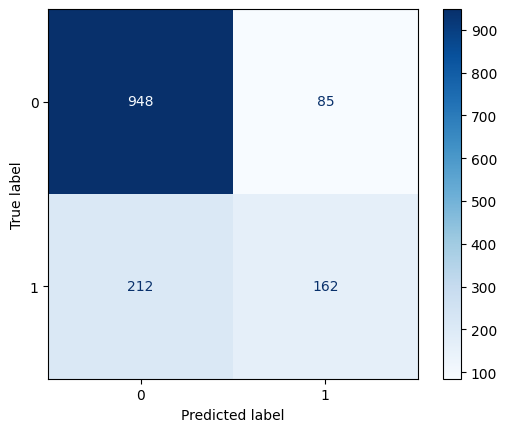

In [37]:

cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

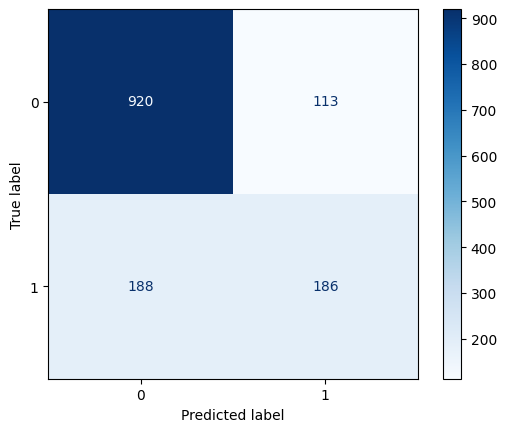

In [38]:
cm = confusion_matrix(y_test, y_pred_gb, labels=gb_model.classes_)

# format and display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Optimizing Hyperparameters

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define classifiers and hyperparameters
classifiers = {
    'Random Forest': (RandomForestClassifier(), {'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200], 'max_features': [1, 3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4]}),
    'Logistic Regression': (LogisticRegression(), {'max_iter': [2000, 4000, 6000]}),
    'Gradient Boosting': (GradientBoostingClassifier(), {'max_depth': [3, 5, 10, None], 'n_estimators': [10, 100, 200], 'max_features': [1, 3, 5, 7], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4]})
}

# Perform grid search for each classifier
for name, (classifier, param_grid) in classifiers.items():
    grid = GridSearchCV(classifier, param_grid=param_grid, cv=3, scoring='accuracy')
    model_grid = grid.fit(X_train, y_train)
    print(f'Best hyperparameters for {name} are: {model_grid.best_params_}')
    print(f'Best score for {name} is: {model_grid.best_score_}')


Best hyperparameters for Random Forest are: {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
Best score for Random Forest is: 0.7973333333333333


C:\Users\elmus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\elmus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Best hyperparameters for Logistic Regression are: {'max_iter': 2000}
Best score for Logistic Regression is: 0.8001777777777778


The output provides information about the best hyperparameters found during the grid search process for each of the three models (Random Forest, Logistic Regression, and Gradient Boosting), as well as the corresponding best scores achieved.

**Random Forest**
```shell
        Best Hyperparameters
            max_depth: 5
            max_features: 5
            min_samples_leaf: 3
            min_samples_split: 3
            n_estimators: 100
        Best Score: 0.7973
```


**Logistic Regression**
```shell
        Best Hyperparameters
            max_iter: 2000
        Best Score: 0.8002
```

**Gradient Boosting**
```shell
        Best Hyperparameters
            max_depth: 3
            max_features: 3
            min_samples_leaf: 3
            min_samples_split: 4
            n_estimators: 100
        Best Score: 0.7964
```
These results indicate the combination of hyperparameters that yielded the highest cross-validated accuracy score during the grid search. The scores provide an estimate of how well each model is expected to perform on unseen data. 

Logistic regression achieved the highest score among the three models.

In [ ]:
model_grid.best_estimator_

LogisticRegression(max_iter=2000)

In [ ]:
print(classification_report(y_test, model_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



# ROC Curve

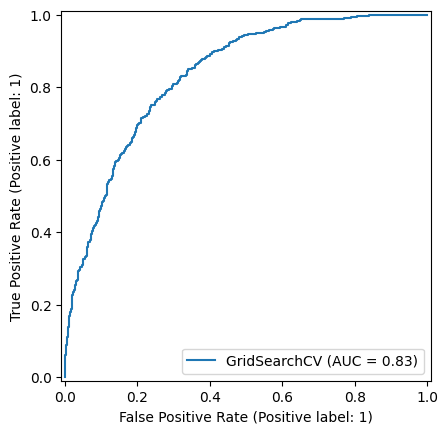

In [ ]:

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model_grid, X_test, y_test)
plt.show()


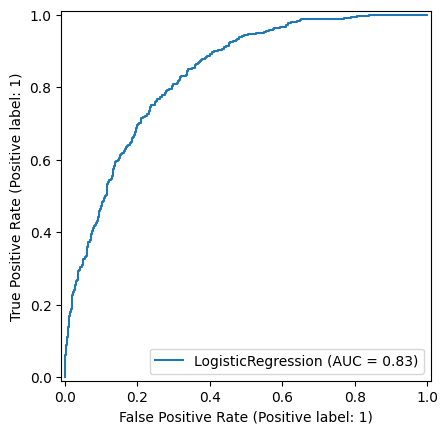

In [ ]:
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.show()


## Using Prediction probabilities

<Axes: xlabel='predicted_probability', ylabel='Density'>

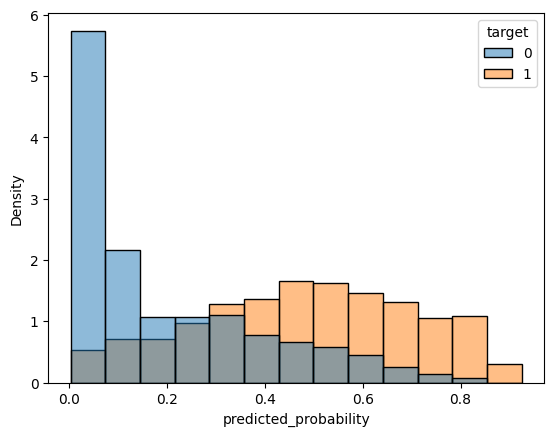

In [ ]:
probabilities = lr_model.predict_proba(X_test)[:, 1]

prob_df = pd.DataFrame(data={'predicted_probability': probabilities, 'target': y_test})

sns.histplot(data=prob_df, x='predicted_probability', hue='target', stat='density', common_norm=False)


In [ ]:
index = prob_df[(prob_df['target'] == 1) & (prob_df['predicted_probability'] < 0.5)].index
prob_df.loc[index]

X_test.loc[index]

,customerID,tenure,PhoneService,MonthlyCharges,TotalCharges,MonthlyCharges_to_TotalCharges_Ratio,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
3716,3716,2,1,20.65,38.70,0.533592,0,0,1,1,0,0,0
446,446,60,1,105.90,6396.45,0.016556,0,0,0,0,0,0,0
4646,4646,30,0,51.20,1561.50,0.032789,0,1,1,0,0,0,0
2035,2035,22,1,79.35,1730.35,0.045858,0,0,0,0,0,0,0
2296,2296,48,1,103.25,5037.55,0.020496,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3511,3511,3,1,43.30,123.65,0.350182,0,0,0,0,0,0,0
4457,4457,12,1,81.70,858.60,0.095155,1,0,1,0,0,0,0
6737,6737,4,1,56.50,235.10,0.240323,0,0,1,1,0,0,0
948,948,2,1,44.95,85.15,0.527892,0,0,1,1,0,0,0


This involves evaluating the logistic regression model and visualizing its performance using various techniques.


Best Estimator: The best estimator obtained from the grid search for the logistic regression model has a max_iter parameter set to 2000.

**Classification Report** 

Precision: Precision measures the proportion of true positive predictions among all positive predictions. A precision of 0.63 for class 1 suggests that among all instances predicted as churn (positive cases), approximately 63% are actually churned customers.

Recall: Recall, also known as sensitivity, measures the proportion of actual positive cases that were correctly identified by the model. A recall of 0.49 for class 1 indicates that the model correctly identified approximately 49% of all churned customers.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. A higher F1-score indicates better balance between precision and recall.

Accuracy: Accuracy represents the overall correctness of the model's predictions, regardless of class. An accuracy of 0.79 indicates that approximately 79% of all predictions made by the model on the test set are correct.

**ROC Curve Display**

The ROC (Receiver Operating Characteristic) curve display is used to visualize the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) for different thresholds of the logistic regression model's predictions.

**Histogram of Predicted Probabilities**

The histogram plots the distribution of predicted probabilities output by the logistic regression model. The distribution is shown separately for each target class (0 and 1).

**Analysis of Low Probability Predictions**

Identification of instances in the test set where the logistic regression model predicted a low probability of churn (predicted probability < 0.5) despite the actual churn label being positive (target = 1). It retrieves the corresponding rows from the test set for further analysis. This analysis helps understand cases where the model might be less confident or where it may need further improvement.


## Summary

A comprehensive analysis of a churn dataset is performed. We start by loading and preprocessing the data, converting categorical features into numeric representations, and splitting it into training and testing sets. Then, a Logistic Regression model is trained and its performance evaluated using accuracy score, confusion matrix, and adjustment of the classification threshold for further evaluation. Additionally, we train Random Forest and Gradient Boosting models and perform hyperparameter tuning using grid search.

The  best hyperparameters and scores for each model are printed out, a classification report for the best-performing model is generated, and ROC curves plotted for comparison. The  distribution of predicted probabilities for each class are visualized and we identify specific records where the model's predictions differ from the actual target values, providing a thorough understanding of the models' performance and insights into potential areas for improvement.

# Deployment

## API Integration
   
The model can be deployed as an API (Application Programming Interface), allowing seamless communication between the customer management system and the predictive model. APIs enable real-time predictions by sending customer data to the model and receiving churn probability scores back from the model.

It can be integrated into the company's existing customer management system to automatically predict the likelihood of churn for each customer based on their historical data and current behavior. This information can then be used by customer service representatives to proactively reach out to at-risk customers, offering personalized retention offers or resolving any issues they might be experiencing.

Moreover, the model's predictions can inform marketing strategies by identifying customer segments with a high churn probability, enabling targeted campaigns to incentivize loyalty and reduce attrition. 

Additionally, the model's insights can guide product development initiatives by highlighting features or services that are correlated with customer retention, aiding in the creation of more appealing offerings. 

The deployment of this churn prediction model can lead to improved customer satisfaction, reduced churn rates, and increased profitability for the business.

